# Case Study
<p>Buat program python dengan VSM secara berkelompok. Buat sebuah korpus terlebih dahulu. Korpus boleh dari twitter, news, ataupun yang lain.

<p>Buat laporan hasil program dengan menentukan 5 kueri.

Dipresentasikan di pertemuan 11

 Korpus dari twitter tentang G20 Indonesia
* NLTK library for :
> Stemming English use Algo Porter <br>
> Stopwords english and Indonesia 
<br>
* Sastrawing for :     
> for stemming Indonesia text


In [58]:
# Install Library sastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import numpy as np

# Get data

In [60]:
df_G20_non_hash=pd.read_csv("/content/dataset_twitter-scraper_G20.csv")
df_G20_hash=pd.read_csv("/content/dataset_twitter-scraper_G20_hash.csv")

In [61]:
df_G20_non_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name,user_mentions/2/id_str,user_mentions/2/name,user_mentions/2/screen_name,user_mentions/3/id_str,user_mentions/3/name,user_mentions/3/screen_name
0,1591778555083755520,2022-11-13T13:02:36.000Z,618,One Earth. One FAMILY. ONE Future !! \n\n#G20 ...,G20,G20India,G20Indonesia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1591802671580995588,2022-11-13T14:38:25.000Z,929,"The G20 delegation has arrived in Bali, they r...",WonderfulIndonesia,G20Indonesia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592038936142295040,2022-11-14T06:17:15.000Z,59,"Tomorrow, the 2022 G20 Bali Summit will be hel...",G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1592152351116333056,2022-11-14T13:47:55.000Z,1123,President Kagame joined President @Macky_Sall ...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,Macky_Sall,2.987156e+09,Cyril Ramaphosa 🇿🇦,CyrilRamaphosa,149991703.0,Alberto Fernández,alferdez,1.976143e+09,Emmanuel Macron,EmmanuelMacron
4,1592254645853995010,2022-11-14T20:34:24.000Z,39,What did I just watch???? #XiJinping #BidenXiM...,XiJinping,BidenXiMeeting,G20Indonesia,G20BaliSummit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_G20_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user/url,user/utc_offset,user/verified,user/want_retweets,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name
0,1528684321254608896,2022-05-23T10:28:38.000Z,182022,Elon musk has changed Twitter like button from...,NaN,NaN,NaN,NaN,NaN,NaN,...,https://t.co/2cZkKNvlDx,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1592060213615812608,2022-11-14T07:41:48.000Z,1029,During the #G20Indonesia Indonesian 🇮🇩 Preside...,G20Indonesia,G20,G20India,NaN,NaN,NaN,...,https://t.co/DyRSJYDSzQ,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592310386954731520,2022-11-15T00:15:54.000Z,324,📸 Here're group photos of #Fellas at various s...,Fellas,Bali,G20Indonesia,NAFOexpansion,NAFO,NAFOFellas,...,NaN,NaN,False,NaN,1.454347e+18,Vasyl Hamianin,VHamianin,NaN,NaN,NaN
3,1592313811121602561,2022-11-15T00:29:30.000Z,1350,Hari ini Indonesia jadi perhatian Dunia\n\nAda...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1592323692775833601,2022-11-15T02:08:41.000Z,59,France's Emmanuel Macron met with Xi Jinping o...,G20Indonesia2022,G20Indonesia,NaN,NaN,NaN,NaN,...,https://t.co/IH4P72QDIe,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

Concat dua data
> karena memakai API dari apify dilakukan pencarian korpus berdasar
hashtag dan tidak menggunakan hashtag agar korpus semakin banyak

In [63]:
df_G20_hash["full_text"],df_G20_non_hash["full_text"]

(0     Elon musk has changed Twitter like button from...
 1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
 2     📸 Here're group photos of #Fellas at various s...
 3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
 4     France's Emmanuel Macron met with Xi Jinping o...
 5     Brown vintage dress ideas✨\n\n— a thread\n\nBa...
 6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
 7     PM @narendramodi meet French 🇫🇷 President Emma...
 8     Hon'ble PM Shri @narendramodi Ji attends the #...
 9     Today in Bali, President Kagame attends the op...
 10    Watch Prime Minister @narendramodi and US Pres...
 11    President Xi Jinping at the G20 official welco...
 12    PM @narendramodi interacted with President Mac...
 13    Prime Ministers @narendramodi and Netherlands ...
 14    Together we are taking action.\n \nProductive ...
 15    ‘I’m having trouble reading this :#LostBiden i...
 16    President Kagame and Indonesian President Joko...
 17    dark-tone shoes reccomme

In [64]:
df_G20_hash["full_text"][0]

'Elon musk has changed Twitter like button from ❤️ to 💙 https://t.co/RJueV7OHyS'

dapat dilihat bahwa ada text elon musk yang tidak relevan terhadap berita G20 

## Gabungkan data terlebih dahulu

In [65]:
df_1=df_G20_hash["full_text"]
df_2=df_G20_non_hash["full_text"]

In [66]:
df_G20_=pd.concat([df_1, df_2], ignore_index=True)

In [67]:
df_G20_=pd.DataFrame({
    "full_text":df_G20_
}) # Simpan data yang sudah yang dsimpan kedalam dataframe

In [68]:
df_G20_.head()

,full_text
0,Elon musk has changed Twitter like button from...
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...
2,📸 Here're group photos of #Fellas at various s...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4,France's Emmanuel Macron met with Xi Jinping o...


## Bersihkan data tidak relevan terhadap berita G20

Melihat masing-masing data yang benar-benar relevan ke berita G20

In [69]:
df_G20_news_only=df_G20_["full_text"].map(lambda news : "G20" in news) # Gunakan fungsi map untuk perulangan agar hanya melihat korpus text yang mengandung kata  "G20"

In [70]:
df=df_G20_[df_G20_news_only]

In [71]:
df["full_text"]

1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
2     📸 Here're group photos of #Fellas at various s...
3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4     France's Emmanuel Macron met with Xi Jinping o...
6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
7     PM @narendramodi meet French 🇫🇷 President Emma...
8     Hon'ble PM Shri @narendramodi Ji attends the #...
9     Today in Bali, President Kagame attends the op...
10    Watch Prime Minister @narendramodi and US Pres...
11    President Xi Jinping at the G20 official welco...
12    PM @narendramodi interacted with President Mac...
13    Prime Ministers @narendramodi and Netherlands ...
14    Together we are taking action.\n \nProductive ...
15    ‘I’m having trouble reading this :#LostBiden i...
16    President Kagame and Indonesian President Joko...
17    dark-tone shoes reccommendation 🖤\n\n—thread\n...
18    The US-India partnership 🇺🇸 🇮🇳\n\n@POTUS @nare...
19    President Kagame attends #G20Indonesia. ht

In [72]:
df.head()

,full_text
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...
2,📸 Here're group photos of #Fellas at various s...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4,France's Emmanuel Macron met with Xi Jinping o...
6,🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...


# Exploration text data

## Melihat berapa stopwords di data text

In [73]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stop_en=stopwords.words('english')
stop_id=stopwords.words('indonesian')

In [75]:
import matplotlib.pyplot as plt
#code from https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
def plot_top_stopwords_barchart(text):
    stop=stop_en+stop_id
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=(15,10))
    plt.bar(x,y)
    plt.title("10 Stopwords yang sering muncul ")

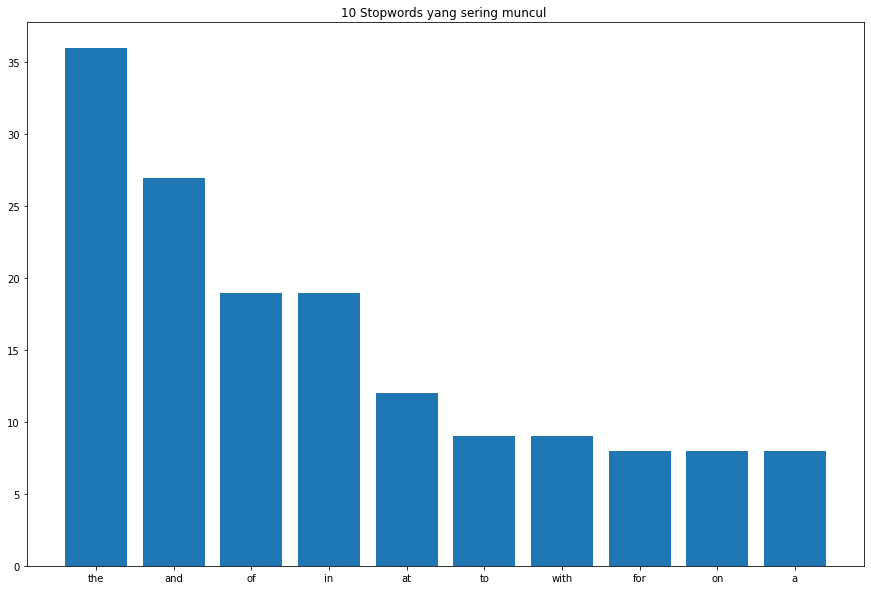

In [76]:
plot_top_stopwords_barchart(df["full_text"])

# Preprocessing text
> Remove Stopwords

> Stemming

> Case folding

## Casefolding

In [77]:
import re

In [78]:
def caseFolding(text):
  text=text.lower()
  text=re.sub(r"[^a-zA-Z]"," ",text) # Menghapus tanda baca dan angka
  text=re.sub(r"https?://\S|www\.\S|t.co?\S"," ",text) # Menghapus url  
  '''
   Logic nya adalah 
   jika terdapat kata https maka hapus 
   jika https?: maka jika ada kata atau text sesudah https maka dihapus 
   jika S+ maka 
  '''
  
  return text

In [79]:
raw_text=df["full_text"][1]
print("Data mentah :",raw_text)
print(f'\nData Case folding : {caseFolding(raw_text)}')

Data mentah : During the #G20Indonesia Indonesian 🇮🇩 President Joko Widodo will symbolically hand over the G20 presidency to Prime Minister at the closing session of the summit in Bali.

#G20  #G20India https://t.co/HFCfSWVvXS

Data Case folding : during the  g  indonesia indonesian    president joko widodo will symbolically hand over the g   presidency to prime minister at the closing session of the summit in bali    g     g  india https     hfcfswvvxs


In [80]:
caseFolding(raw_text)

'during the  g  indonesia indonesian    president joko widodo will symbolically hand over the g   presidency to prime minister at the closing session of the summit in bali    g     g  india https     hfcfswvvxs'

In [81]:
stop_en=stopwords.words('english')
stop_id=stopwords.words('indonesian')

In [82]:
def flatten(l):
    """
    Same as 
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])
    
def remove_stop_words(text):
  stp=stop_en+stop_id
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stp]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

In [83]:
print(f'Stopwords remove: {remove_stop_words(caseFolding(raw_text))}')

Stopwords remove: g indonesia indonesian president joko widodo symbolically hand g presidency prime minister closing session summit bali g g india https hfcfswvvxs


## Stemming

In [84]:
from nltk.stem.porter import PorterStemmer # Stemming untuk teks bahasa inggris
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming untuk teks bahasa Indonesia

In [85]:
stem_en=PorterStemmer()
fact_stem_id=StemmerFactory()
stem_id=fact_stem_id.create_stemmer()

In [86]:
def stemsWords(text):
  text_en=stem_en.stem(text)
  text_id=stem_id.stem(text_en)
  return text_id

In [87]:
stemsWords(remove_stop_words(caseFolding(raw_text)))

'g indonesia indonesian president joko widodo symbolically hand g presidency prime mister closing session summit bal g g india https hfcfswvvx'

## Text preprocessing pipeline

In [88]:
def text_preprocessing_process(text):
  text = caseFolding(text)
  text = remove_stop_words(text)
  text = stemsWords(text)
  return text

In [89]:
df["clean text"]=df["full_text"].apply(text_preprocessing_process)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df

,full_text,clean text
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...,g indonesia indonesian president joko widodo s...
2,📸 Here're group photos of #Fellas at various s...,group photos fellas various spots bal commemor...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...,indonesia perhati dunia presiden latar tukang ...
4,France's Emmanuel Macron met with Xi Jinping o...,france emmanuel macron met xi jinping g sideli...
6,🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...,g indonesia hetalia hwsindonesia g g indonesia...
7,PM @narendramodi meet French 🇫🇷 President Emma...,pm narendramodi meet french president emmanuel...
8,Hon'ble PM Shri @narendramodi Ji attends the #...,hon ble pm shri narendramodi ji attends g indo...
9,"Today in Bali, President Kagame attends the op...",today bal president kagame attends opening g i...
10,Watch Prime Minister @narendramodi and US Pres...,watch prime mister narendramodi us president j...
11,President Xi Jinping at the G20 official welco...,president xi jinping g official welcome presid...


# Buat VSM
> Lakukan Countvectorizer <br>
 Melihat banyak kata yang muncul dalam setiap dokumen <br>

> Lakukan TfIdf

## Lakukan Countvectorizer

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [92]:
korpus=df["clean text"]

In [93]:
X = vectorizer.fit_transform(korpus)

In [94]:
vectorizer.get_feature_names_out()

array(['action', 'address', 'addressing', 'affordable', 'africa',
       'african', 'al', 'alferdez', 'also', 'ambassador', 'amp', 'arab',
       'arabia', 'arah', 'archi', 'argentina', 'arrived', 'ast',
       'attends', 'au', 'bal', 'balisummit', 'basic', 'bca', 'beautiful',
       'bg', 'biden', 'bidenximeeting', 'bilateral', 'bin', 'birthday',
       'ble', 'bo', 'bornpinkjakarta', 'brown', 'bua', 'build',
       'business', 'calling', 'cat', 'ce', 'chair', 'chairman',
       'chairperson', 'challenges', 'china', 'cina', 'closing',
       'coldplay', 'commemorating', 'commitment', 'cooperate',
       'cooperation', 'country', 'cp', 'crown', 'cultural', 'current',
       'currently', 'cyrilramaphosa', 'dark', 'delegation', 'digital',
       'dinner', 'diplomatic', 'discuss', 'discusses', 'dkagvsq', 'dll',
       'dn', 'dorong', 'dress', 'dunia', 'dx', 'earth', 'economic',
       'efforts', 'ekonomi', 'emmanuel', 'emmanuelmacron', 'enable',
       'enchantedtomeetjake', 'energy', 'en

In [95]:
korpus_unigram=X.toarray()
data_unigram = pd.DataFrame(korpus_unigram, columns=vectorizer.get_feature_names_out())
data_unigram

,action,address,addressing,affordable,africa,african,al,alferdez,also,ambassador,...,xcz,xee,xi,xijinping,xycfjegna,yacnl,yg,yvmc,zayed,zxz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


## Lakukan TFidF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [97]:
korpus=vectorizer.fit_transform(korpus)

In [98]:
korpus_unigram=korpus.toarray()
data_unigram = pd.DataFrame(korpus_unigram, columns=vectorizer.get_feature_names_out())
data_unigram

,action,address,addressing,affordable,africa,african,al,alferdez,also,ambassador,...,xcz,xee,xi,xijinping,xycfjegna,yacnl,yg,yvmc,zayed,zxz
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.214704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.183549,0.000000,0.000000,0.000000
3,0.000000,0.192933,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.192933,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.335921,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.187412,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.187412,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.266762,0.0000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.410499,0.000000,0.000000,0.2477,0.000000,0.000000,0.000000,0.000000


In [99]:
class Appearance:
  def __init__(self, docId, frequency):
    self.docId = docId
    self.frequency = frequency
  
  def __repr__(self) :
    return str(self.__dict__)

In [100]:
def invertedIndex(index, document):
  korpus = df['clean text']
  terms = korpus.split(' ')
  appearances_dict = dict()
  # Dictionary with each term and the frequency it appears in the text.
  for term in terms:
    term_frequency = appearances_dict[term].frequency if term in appearances_dict else 0
    #jika pertama kali term muncul dan belum disimpan frekuensinya diset menjadi 1
    #jika di dokumen yang sama muncul kata yang sama maka frekuensinya akan bertambah 1
    #id dokumen akan disimpan
    appearances_dict[term] = Appearance(document['id'], term_frequency+1)

  #Update the inverted index ( proses penyimpanan ke dicitonary)
  update_dict = { key: [appearance]
                 if key not in index
                 else index[key] + [appearance]
                 for (key, appearance) in appearances_dict.items()}
  index.update(update_dict)
  return index

In [101]:
# jika tidak membuat bahasa inggris maka class appearance dan fungsi inverted index tetap harus dibuat dan dijalankan
indeksEng = {}

for row_dict in df.to_dict(orient="records"):
  invertedIndex(indeksEng, row_dict)

AttributeError: ignored

In [102]:
indeksEng

{}

In [103]:
import copy
#membuat copy dictionary dari inverted index, nantinya akan diganti nilai frequency menjadi bobot tfidf
tfidfEng = copy.deepcopy(indeksEng)

In [104]:
jumlahdok = len(df.index) #hitung jumlah dokumen
jumlahdok

41

In [105]:
panjangVektorDok = [0]*jumlahdok # inisialisasi awal untuk list tempat menyimpan panjang vektor setiap dokumen
listidfEng = []


In [106]:
for key in indeksEng:
  dfEng = len(indeksEng[key]) # menghitung df dari setiap term
  idfEng = np.log10(jumlahdok/dfEng)
  listidfEng.append(idfEng)
  i = -1 # asli ini i = apa gk keliatan jelas
  for value in indeksEng[key]:
    tfidfEng[key][i].frequency = value.frequency*idfEng
    #menghitung panjang vektor dokumen disimpan sesuai indeks dokumen (jika dok 1 maka disimpan diindeks 0)
    panjangVektorDok[value.docId-1] = panjangVektorDok[value.docId-1]+(tfidfEng[key][i].frequency*tfidfEng[key][i].frequency)
    i+=1

In [ ]:
# Menghitung term frequency kueri
search_term = input("Masukkan Kueri ")
cleanKueri = korpus(search_term)
listkueri = cleanKueri.split()
unique = set(listkueri)
dictKueri = dict.fromkeys(unique, 0)
for k in listkueri:
  if k in dictKueri.keys():
    dictKueri[k] = dictKueri.get(k)+1

In [ ]:
dictKueri

In [ ]:
tfidfQ = copy.deepcopy(dictKueri)
panjangVektorKueri = 0
for k in dictKueri:
  d = [x for x in indeksEng if k in x] != []
  if d == True :
    tfidfQ[k] = dictKueri.get(k)*listidfEng[list(tfidfEng.keys()).index(k)]
    panjangVektorKueri = panjangVektorKueri + (tfidfQ[k]*tfidfQ[k])
  else:
      del tfidfQ[k]
tfidfQ

In [ ]:
cossin = []
for i in range(jumlahdok):
  pembilang = 0
  for k in tfidfQ:
    for v in tfidfEng[k]:
      if v.docId == (i+1):
        pembilang = pembilang + tfidfQ.get(k)*v.frequency
  score = pembilang/np.sqrt(panjangVektorKueri*panjangVektorDok[i])
  print('skor similiarity kueri dengan d- ',(i+1),':',score)

## Untuk Lanjutannya hanya aku lanjutin segini dulu ja, jika ada salah atau kurangnya tolong cek. Seharusnya sehabis line code terakhir ini dibuat vectorizer, karena udah dibuat diawal awal jadi tidak tak ketik lagi trims.
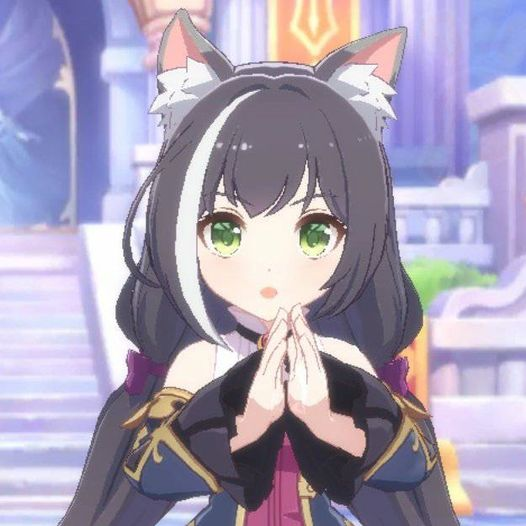